In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
font = {'size'   : 22}
mpl.rc('font', **font)

mpl.rcParams['lines.markersize'] = 1
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
dfmasc = pd.read_csv("./bases/suicide/suicidioMasculino.csv")

In [3]:
dfreg = pd.read_csv("./bases/wdi/Country.csv")

In [4]:
df = pd.read_csv("./bases/education/EdStatsAjustado.csv")

In [5]:
dfregmerge = dfreg[['CountryCode','Region','IncomeGroup']].copy()
dfregmerge.rename(columns={'CountryCode':'countrycode','Region':'region','IncomeGroup':'incomegroup'},inplace=True)

In [6]:
dfx = df[df.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
dfx = dfx[["CountryCode","Year","Value"]].reset_index(drop=True)
dfx.rename(columns={'CountryCode':'countrycode','Year':'year','Value':'value'},inplace=True)

In [7]:
dfx

,countrycode,year,value
0,ALB,2000,4026.537422
1,ATG,2000,14987.411027
2,ARG,2000,11810.061364
3,ARM,2000,2318.238073
4,ABW,2000,NaN
5,AUS,2000,26406.130951
6,AUT,2000,29357.485725
7,BHS,2000,20487.343180
8,BHR,2000,35622.601699
9,BRB,2000,12275.054497


In [8]:
dfmasc = dfmasc.join(dfx.set_index(['countrycode','year']), on=['countrycode','year'])

In [9]:
dfmasc.rename(columns={'value':'gdp'}, inplace=True)

In [10]:
df2 = pd.merge(dfmasc, dfregmerge, on='countrycode')
df2.region.unique()
#df2 = df2.replace({'East Asia & Pacific':0,'Europe & Central Asia':1,
#       'Latin America & Caribbean':2, 'Middle East & North Africa':3,
#       'North America':4, 'Sub-Saharan Africa':5})
regioes = ['Europe & Central Asia', 'Latin America & Caribbean',
       'East Asia & Pacific', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'North America', 'South Asia']
df2['idregion'] = df2['region'].apply(lambda x: regioes.index(x) )
df2['idregion'] = pd.to_numeric(df2['idregion'])

In [11]:
df2['incomegroup'].unique()


array(['Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD', 'Low income'],
      dtype=object)

In [12]:
incomegroups = list(df2['incomegroup'].unique())
df2['idincome'] = df2['incomegroup'].apply(lambda x: incomegroups.index(x))
df2['idincome'] = df2['incomegroup'].apply(lambda x: incomegroups.index(x))
df2['idincome'] = pd.to_numeric(df2['idincome'])

In [13]:
df2['idincome'].unique()

array([0, 1, 2, 3, 4])

In [14]:
dfmelt = df2[['country','year','suicidio2534','suicidio3554','gdp']].copy()
dfmelt = dfmelt.melt(id_vars=["country", "year",'gdp'], 
        var_name="age", 
        value_name="Value")

In [18]:
dft = df2[['country','year','suicidio3554','gdp']].copy()
dft

,country,year,suicidio3554,gdp
0,Albania,2000,1.067521,4026.537422
1,Albania,2001,8.975097,4463.632986
2,Albania,2002,9.158971,4754.675856
3,Albania,2003,7.250205,5114.784779
4,Albania,2004,9.954897,5524.921661
5,Albania,2005,0.000000,5942.870083
6,Albania,2006,0.000000,6634.779222
7,Albania,2007,7.659273,7289.632366
8,Albania,2008,9.811227,8228.357428
9,Albania,2009,0.000000,8823.802984


In [19]:
dft['suiciderange'] = pd.cut(dft.suicidio3554, bins=np.arange(0, 90, step=10), include_lowest=True, labels=[0,1,2,3,4,5,6,7])
dft['gdprange'] = pd.cut(dft.gdp, bins=np.arange(1600, 130000, step=10000), include_lowest=True, labels=range(12))
dft['gdprange'].unique()
dft['suiciderange'] = pd.to_numeric(dft['suiciderange'])
dft['gdprange'] = pd.to_numeric(dft['gdprange'])

,country,year,suicidio3554,gdp,suiciderange,gdprange
0,Albania,2000,1.067521,4026.537422,0.0,0.0
1,Albania,2001,8.975097,4463.632986,0.0,0.0
2,Albania,2002,9.158971,4754.675856,0.0,0.0
3,Albania,2003,7.250205,5114.784779,0.0,0.0
4,Albania,2004,9.954897,5524.921661,0.0,0.0
5,Albania,2005,0.000000,5942.870083,0.0,0.0
6,Albania,2006,0.000000,6634.779222,0.0,0.0
7,Albania,2007,7.659273,7289.632366,0.0,0.0
8,Albania,2008,9.811227,8228.357428,0.0,0.0
9,Albania,2009,0.000000,8823.802984,0.0,0.0


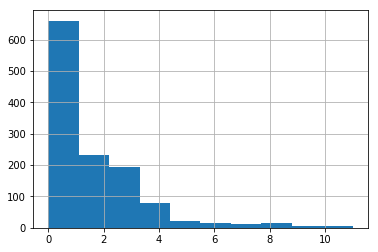

In [23]:
dft['gdprange'].hist()
dft

In [29]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chisq_of_df_cols(df, c1, c2):
    groupsizes = dft.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

stat, p, dof, expected =chisq_of_df_cols(dft, 'suiciderange', 'gdprange')
print('dof=%d' % dof)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('rejeita h0')
else:
    print('falha ao rejeitar h0')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%f' % (alpha, p))
if p <= alpha:
    print('rejeita h0')
else:
    print('falha ao rejeitar h0')
print('p value = '+str(p))

dof=77
probability=0.950, critical=98.484, stat=420.250
rejeita h0
significance=0.050, p=0.000000
rejeita h0
p value = 9.872903313748043e-49


In [34]:
groupsizes = dft.groupby(['suiciderange', 'gdprange']).size()
ctsum = groupsizes.unstack('suiciderange')
ctsum

suiciderange,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
gdprange,,,,,,,,
0.0,150.0,79.0,61.0,15.0,9.0,9.0,6.0,18.0
1.0,71.0,77.0,41.0,29.0,15.0,28.0,20.0,7.0
2.0,40.0,52.0,59.0,39.0,28.0,8.0,NaN,3.0
3.0,17.0,55.0,81.0,25.0,15.0,NaN,NaN,NaN
4.0,4.0,12.0,59.0,5.0,NaN,NaN,NaN,NaN
5.0,3.0,5.0,15.0,NaN,NaN,NaN,NaN,NaN
6.0,1.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
7.0,8.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
8.0,8.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN


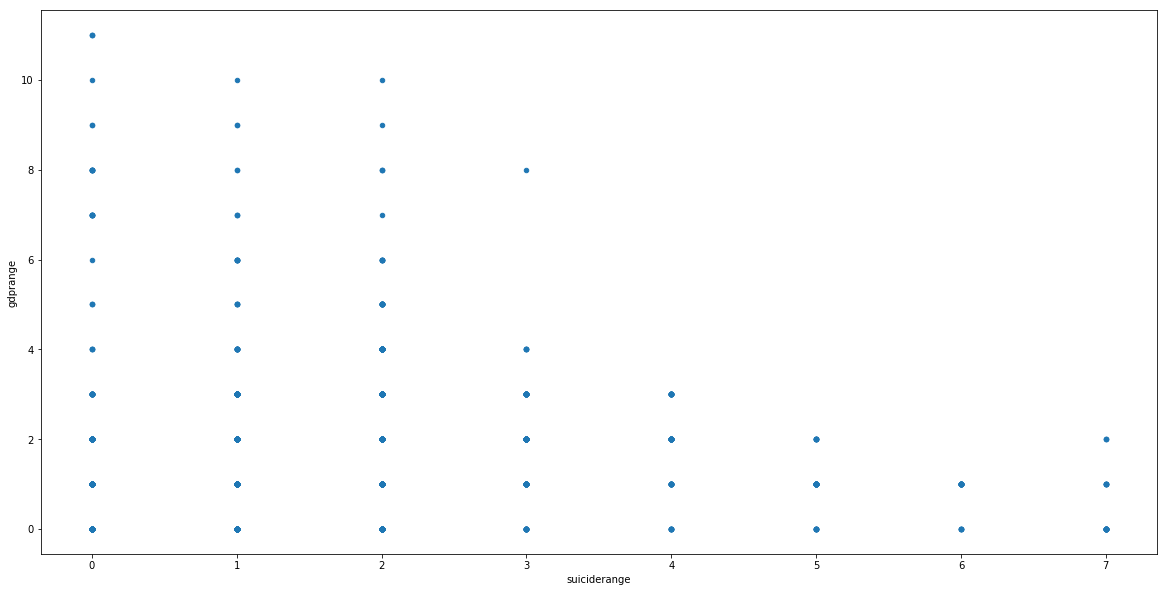

In [35]:
dft['suiciderange'].corr(dft['gdprange'])

fig, ax = plt.subplots(figsize=(20,10))
test = dft.plot.scatter('suiciderange','gdprange',ax=ax) 

In [31]:
dft

,country,year,suicidio3554,gdp,suiciderange,gdprange
0,Albania,2000,1.067521,4026.537422,0.0,0.0
1,Albania,2001,8.975097,4463.632986,0.0,0.0
2,Albania,2002,9.158971,4754.675856,0.0,0.0
3,Albania,2003,7.250205,5114.784779,0.0,0.0
4,Albania,2004,9.954897,5524.921661,0.0,0.0
5,Albania,2005,0.000000,5942.870083,0.0,0.0
6,Albania,2006,0.000000,6634.779222,0.0,0.0
7,Albania,2007,7.659273,7289.632366,0.0,0.0
8,Albania,2008,9.811227,8228.357428,0.0,0.0
9,Albania,2009,0.000000,8823.802984,0.0,0.0


Text(0.5, 1.0, 'Suicídios masculinos por PIB e região')

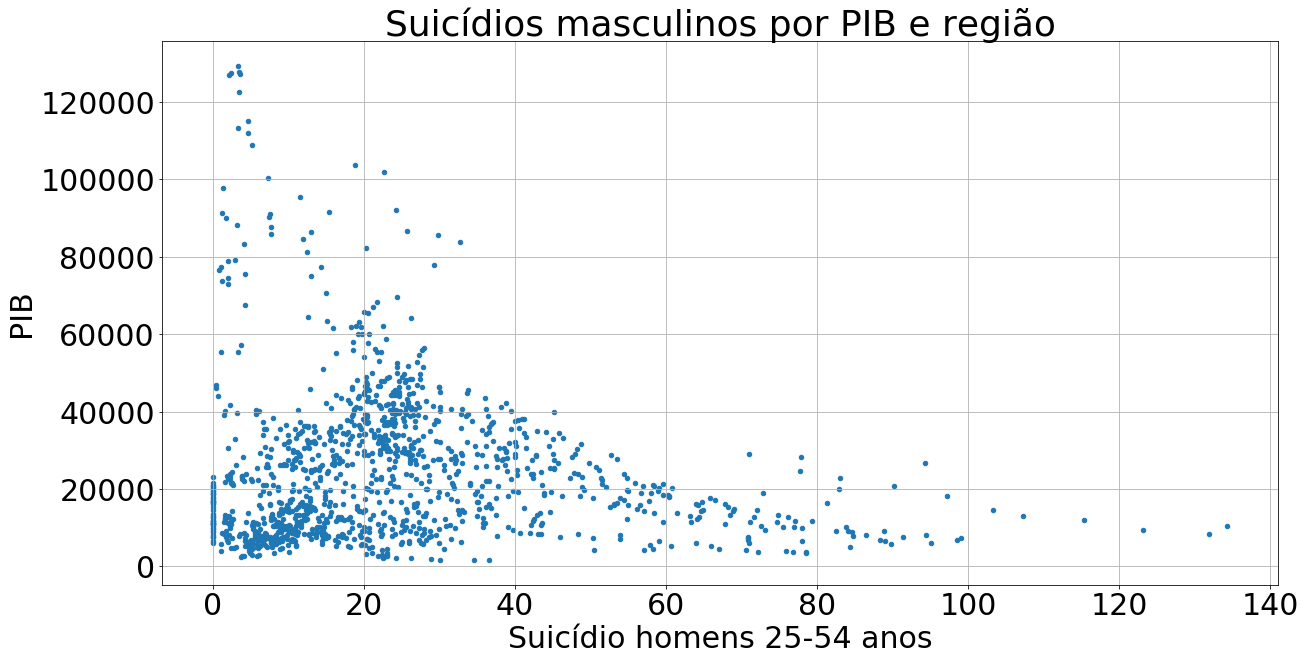

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
cmap = ListedColormap(['blue', 'green'])
test = dft.plot.scatter('suicidio3554','gdp',ax=ax, grid=True) 

#ax.set_ylim(0,60000)
ax.set_ylabel('PIB')
ax.set_xlabel('Suicídio homens 25-54 anos')
ax.set_title("Suicídios masculinos por PIB e região")

In [35]:
dfcorr = pd.DataFrame(columns=['country','une1524', 'une2534', 'une3554','une5574','une75'])

for name, group in dfmasc.groupby('country'):
    a = group['suicidio1524'].corr(group['gdp'])
    b = group['suicidio2534'].corr(group['gdp'])
    c = group['suicidio3554'].corr(group['gdp'])
    d = group['suicidio5574'].corr(group['gdp'])
    e = group['suicidio75'].corr(group['gdp'])
    dfcorr = dfcorr.append(pd.Series([name,a,b,c,d,e], index=dfcorr.columns ),ignore_index=True)
    dfcorr.rename(columns={'une1524':'15-24','une2534':'25-34','une3554':'35-54','une5574':'55-74','une75':'75+'},inplace=True)
dfcorr = dfcorr.melt(id_vars=["country"], 
        var_name="nome",
        value_name="correlacao")
dfcorr

/home/nicoedu/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/nicoedu/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,country,nome,correlacao
0,Albania,15-24,-0.093506
1,Antigua and Barbuda,15-24,NaN
2,Argentina,15-24,0.635655
3,Armenia,15-24,0.067487
4,Aruba,15-24,NaN
5,Australia,15-24,-0.458851
6,Austria,15-24,-0.833744
7,Bahamas,15-24,0.181533
8,Bahrain,15-24,-0.031617
9,Barbados,15-24,-0.407708


Text(0.5, 1.0, 'Correlação entre suicídios masculinos e gdp')

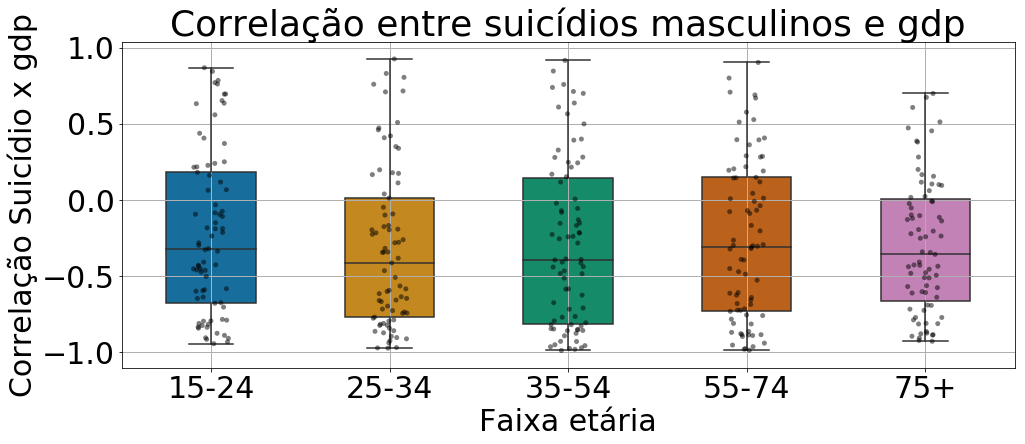

In [36]:
fig, ax = plt.subplots(figsize=(16, 6))

bplot=sns.boxplot(y='correlacao', x='nome', 
                 data=dfcorr, 
                 width=0.5,
                 palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='correlacao', x='nome', 
                   data=dfcorr, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')
ax.grid(b=True, which='major', linewidth=1)
ax.set_xlabel('Faixa etária')
ax.set_ylabel('Correlação Suicídio x gdp')
ax.set_title("Correlação entre suicídios masculinos e gdp")